## "Algorithm Selection for Textual Data Classification in Quora Dataset: A Comparative Analysis of Logistic Regression, SVM, and Decision Trees"

### Importing Libraries ###
**we import necessary libraries like NumPy, Pandas, and NLTK.**
- numpy: A library for scientific computing with Python.
- pandas: A library for data analysis and manipulation.
- nltk: A library for natural language processing.
- stopwords: A list of common words that are not considered to be informative in natural language processing tasks.
- string: A library for manipulating strings in Python.

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

**This code checks the paths where NLTK data is stored. NLTK (Natural Language Toolkit) is used for various NLP tasks, and it requires data files to be downloaded.**

In [2]:
import nltk
print(nltk.data.path)

['C:\\Users\\Umesh/nltk_data', 'C:\\Users\\Umesh\\anaconda3\\nltk_data', 'C:\\Users\\Umesh\\anaconda3\\share\\nltk_data', 'C:\\Users\\Umesh\\anaconda3\\lib\\nltk_data', 'C:\\Users\\Umesh\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


### Loading Data ###
**Here, we're loading our dataset from a CSV file named "question2_.csv" into a Pandas DataFrame named "df."**

In [3]:
df=pd.read_csv("question2_.csv")
df

,id,question1,question2,is_duplicate
0,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...
9996,9996,Stphen william hawking?,"What are the differences between SM, YG and JY...",0
9997,9997,Mathematical Puzzles: What is () + () + () = 3...,What are the steps to solve this equation: [ma...,0
9998,9998,Is IMS noida good for BCA?,How good is IMS Noida for studying BCA?,1
9999,9999,What are the most respected and informative te...,What are Caltech's required and recommended te...,0


In [4]:
df.head()

,id,question1,question2,is_duplicate
0,0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            10001 non-null  int64 
 1   question1     10001 non-null  object
 2   question2     10001 non-null  object
 3   is_duplicate  10001 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 312.7+ KB


### Data Preprocessing ###
**we starts data preprocessing from identifying the null values**
- check for and handle any missing values (NaN).
This code checks for missing values in the DataFrame and returns a Boolean value for each column to indicate whether it contains missing values.

In [6]:
df.isnull().any()

id              False
question1       False
question2       False
is_duplicate    False
dtype: bool

- The resulting stop_words variable contains a set of English stopwords 
- which is used later to filter out common words from text data during text preprocessing. 
**for example,**

Articles: "a," "an," "the"
Prepositions: "in," "on," "at," "by," "with"
Conjunctions: "and," "but," "or," "because"

In [7]:
stop_words=set(stopwords.words('english'))

#### tokenization:split text into words ####
- Here we define a function preprocess_text(text) to process the text data:
- If the text is a string (not NaN or float), tokenize the text into individual words.
- convert all words to lowercase.
- remove common English stopwords and punctuation.
- Finally, you join the cleaned words back into a single string.

In [8]:
def preprocess_text(text):
    if isinstance(text, str):
        words=text.split()
        clean_words = [word.lower() for word in words if word.lower()  not in stop_words and word not in string.punctuation]
        clean_text=' '.join(clean_words) 
        return clean_text
    else:
        return '' 

##### **Here we apply this text preprocessing function to both 'question1' and 'question2' columns.** #####

In [9]:
df['question1'] = df['question1'].apply(preprocess_text)
df['question2'] = df['question2'].apply(preprocess_text)

### Feature Extraction (TF-IDF Vectorization) ###
It is a technique in natural language processing where text documents are transformed into numerical vectors based on word frequencies,
emphasizing the importance of words in a document relative to a larger corpus.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

- Here we create an instance of the TfidfVectorizer with specific configurations:
- max_features: The maximum number of features to consider (adjustable).
- ngram_range: Consider both unigrams and bigrams.
- stop_words: Remove common English stopwords.

In [11]:
tfidf_vectorizer = TfidfVectorizer(max_features=404351,  
                                   ngram_range=(1, 2), 
                                   stop_words='english')

##### Here we fit this vectorizer on the combined text from 'question1' and 'question2' in your DataFrame, creating a TF-IDF matrix named 'tfidf_matrix'. #####

In [12]:
# Fit and transform the vectorizer on the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['question1'] + ' ' + df['question2'])

### Splitting Data for Training and Testing ###

In [13]:
#Model selection
from sklearn.model_selection import train_test_split

##### The feature matrix 'x' contains the TF-IDF transformed data.
##### The target variable 'y' contains the 'is_duplicate' labels. #####

In [14]:
x=tfidf_matrix
y=df['is_duplicate']

- we split our data into training and testing sets using train_test_split from scikit-learn.
- we set aside 80% of the data for training and 20% for testing.

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
x.shape

(10001, 81881)

In [17]:
y.shape

(10001,)

### Training a Logistic Regression Model ###
- import the LogisticRegression model from scikit-learn.
- create an instance of the logistic regression model with a specified maximum number of iterations.
- train this model using the training data (x_train and y_train) with the fit method.
- The trained model is used to make predictions on the test data (x_test) with predict.

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [20]:
y_pred = logistic_regression_model.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

##### calculate and print accuracy and precision scores for model evaluation using scikit-learn metrics.

In [21]:
from sklearn.metrics import accuracy_score,precision_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")

Accuracy: 0.70
Precision: 0.74


##### A confusion matrix is a table used to evaluate the performance of a classification model. #####
##### It displays true positive, true negative, false positive, and false negative counts.
##### The code uses seaborn to create a heatmap of the confusion matrix with annotations.
##### It helps assess the model's accuracy, precision, recall, and F1-score.

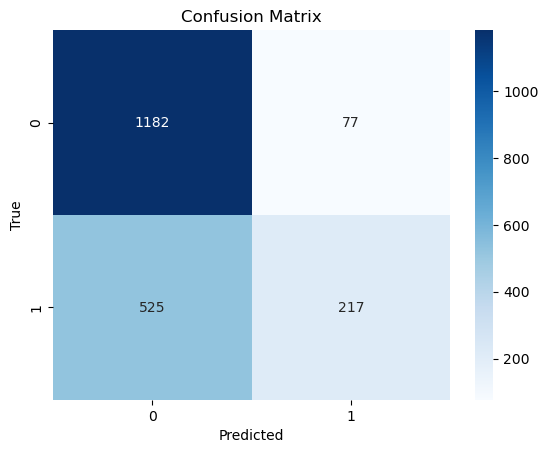

In [22]:
#This code generates a confusion matrix to visualize the performance of the Logistic Regression model.
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Training a Support Vector Machine (SVM) Classifier

- we import the Support Vector Machine classifier (SVC) from scikit-learn.
- we create an instance of the SVM classifier.
- we train this classifier using the training data and evaluate its performance by calculating accuracy and precision.

In [23]:
from sklearn.svm import SVC

In [24]:
svm_classifier = SVC()

In [25]:
svm_classifier.fit(x_train, y_train)

SVC()

In [26]:
y_pred_svm = svm_classifier.predict(x_test)

In [27]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print(f"Precision for SVM: {precision_svm:.2f}")

SVM Accuracy: 0.7051474262868566
Precision for SVM: 0.77


### Training a Decision Tree Classifier:

- we import the DecisionTreeClassifier from scikit-learn.
- we create an instance of the decision tree classifier.
- Then train this classifier using the training data and evaluate its performance by calculating accuracy and precision.

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
decision_tree_classifier = DecisionTreeClassifier()

In [30]:
decision_tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred = decision_tree_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred)
print(f"decision tree Accuracy: {accuracy:.2f}")
print(f"Precision for Decision Tree: {precision_dt:.2f}")

decision tree Accuracy: 0.67
Precision for Decision Tree: 0.56


### Plotting ROC and Precision-Recall Curves (Logistic Regression)

##### ROC Curve is a graphical plot that illustrates the trade-off between a binary classification model's true positive rate (sensitivity) and false positive rate (1-specificity) at various threshold settings.

##### Precision-Recall Curve is a graphical plot that displays the relationship between precision (positive predictive value) and recall (true positive rate) for different classification model thresholds. It helps assess a model's trade-off between precision and recall.

- First we  import necessary libraries for plotting ROC and Precision-Recall curves.
- Then we calculate the False Positive Rate (FPR) and True Positive Rate (TPR).
- for the Logistic Regression model to plot the ROC curve and compute the area under the curve (AUC).

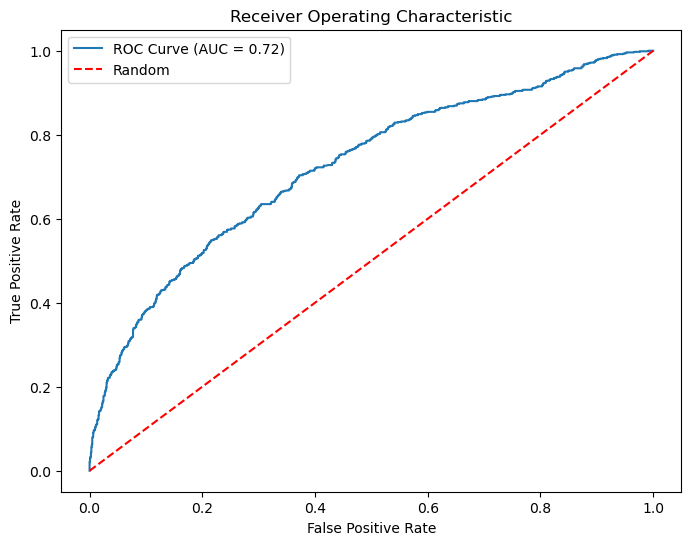

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
fpr, tpr, _ = roc_curve(y_test, logistic_regression_model.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y_test, logistic_regression_model.predict_proba(x_test)[:, 1])
average_precision = average_precision_score(y_test, logistic_regression_model.predict_proba(x_test)[:, 1])
# Plot ROC curve
plt.figure(figsize=(8, 6))
# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

- we also calculate and plot the Precision-Recall curve for the Logistic Regression model, calculating the average precision score (AP).

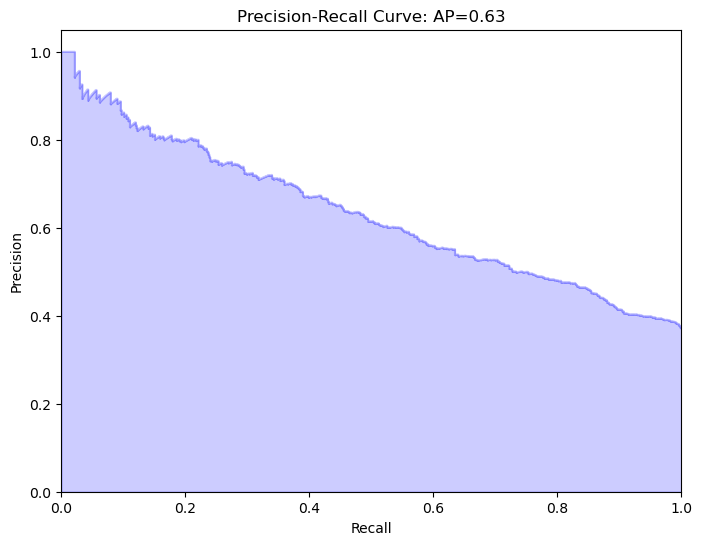

In [33]:
#This code generates and plots the Precision-Recall curve for the Logistic Regression model and displays the Average Precision (AP) score.
# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve: AP={0:0.2f}'.format(average_precision))
plt.show()

***In conclusion, this project was undertaken for analysis purposes, aiming to determine the most suitable machine learning algorithm for a given dataset. Logistic Regression, Support Vector Machine (SVM), and Decision Tree algorithms were evaluated based on their metric scores, including accuracy, precision, and more. The goal was to select the algorithm that best fits the dataset's characteristics and requirements, ensuring optimal model performance for the specific task at hand. This analysis-driven approach aids in making informed decisions for model selection and deployment in real-world applications.***